# Solution 7.5.3 Forbes

Author: Marcel Steiner-Curtis \
Date: 21.08.2019 sml, 06.03.2021 sml: Python-Jupyter Notebook

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import scipy as scp
import warnings
warnings.filterwarnings('ignore')

##   Solution 7.5.3 Forbes

read data

In [2]:
os.chdir('../04 Datasets')
data = pd.read_csv('forbes.dat', sep='\t')
data.head()

,Boiling,Pressure
0,194.5,20.79
1,194.3,20.79
2,197.9,22.40
3,198.4,22.67
4,199.4,23.15


### (a) Scatter Diagram

define new variable

In [3]:
data['Pressurelog'] = np.log10(data.Pressure)

scatter diagram

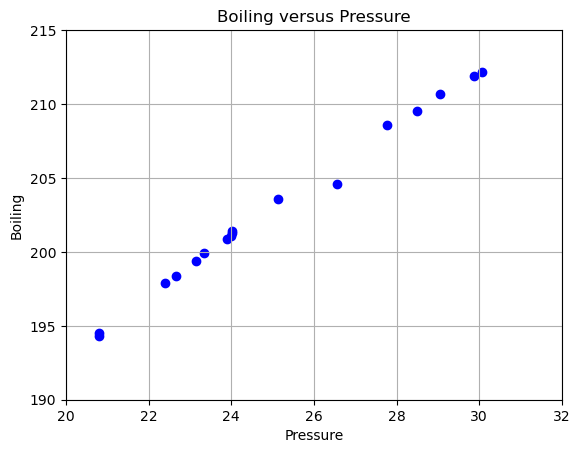

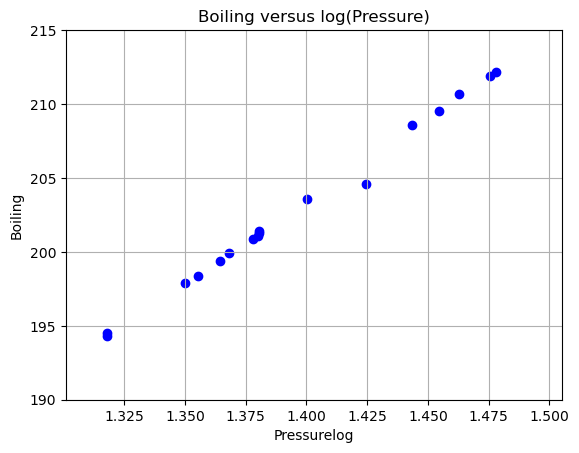

In [4]:
plt.close()
plt.xlim([20,32])
plt.ylim([190,215])
plt.scatter(data.Pressure, data.Boiling, color='blue')
plt.grid()            
plt.axhline(y=0, color='black', linewidth=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)
plt.title('Boiling versus Pressure')
plt.xlabel('Pressure')
plt.ylabel('Boiling')
plt.show()

plt.close()
plt.xlim(np.log10([20,32]))
plt.ylim([190,215])
plt.scatter(data.Pressurelog, data.Boiling, color='blue')
plt.grid()            
plt.axhline(y=0, color='black', linewidth=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)
plt.title('Boiling versus log(Pressure)')
plt.xlabel('Pressurelog')
plt.ylabel('Boiling')
plt.show()

REMARKS: In the first diagram the points are slightly curved.
In the second diagram the points lie almost perfectly on a straight line.
There might be an outlier.

### (b) Parameter Estimation

Estimation of the parameters

In [5]:
mod = smf.ols(formula='Boiling ~ Pressurelog', data=data).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Boiling   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     2962.
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           1.19e-18
Time:                        13:09:07   Log-Likelihood:                -8.4026
No. Observations:                  17   AIC:                             20.81
Df Residuals:                      15   BIC:                             22.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      47.8638      2.852     16.784      0.000      41.786      53.942
Pressurelog   111.0921      2.041     54.420      0.000     106.741     115.443
==============================================================================
Omnibus:                       37.131   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.947
Skew:                          -3.091   Prob(JB):                     1.32e-19
Kurtosis:                      12.195   Cond. No.                         58.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

graphic

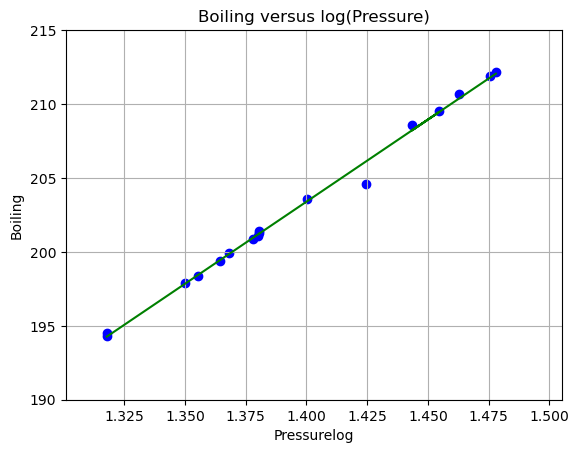

In [6]:
plt.close()
plt.xlim(np.log10([20,32]))
plt.ylim([190,215])
plt.scatter(data.Pressurelog, data.Boiling, color='blue')
plt.grid()            
plt.axhline(y=0, color='black', linewidth=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)
plt.title('Boiling versus log(Pressure)')
plt.xlabel('Pressurelog')
plt.ylabel('Boiling')
#   add best model
plt.plot(data.Pressurelog, mod.predict(), color='green')
plt.show()

REMARKS: The straight line model almost perfectly describes the transformed data.
The point with index 11 seems to be too far away from the line. It might be an outlier.

### (c) Parameter Estimation without Outlier

Estimation of the parameters

In [7]:
modred = smf.ols(formula='Boiling ~ Pressurelog', data=data.drop([11])).fit()
modred.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Boiling   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.249e+04
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           5.77e-25
Time:                        13:09:07   Log-Likelihood:                 11.326
No. Observations:                  16   AIC:                            -18.65
Df Residuals:                      14   BIC:                            -17.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      46.4530      0.868     53.498      0.000      44.591      48.315
Pressurelog   112.1713      0.622    180.237      0.000     110.836     113.506
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   1.542
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.230
Skew:                           0.597   Prob(JB):                        0.541
Kurtosis:                       2.352   Cond. No.                         57.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

graphic

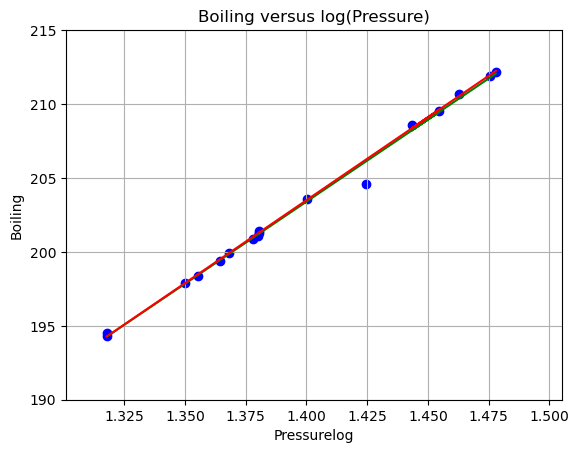

In [8]:
plt.close()
plt.xlim(np.log10([20,32]))
plt.ylim([190,215])
plt.scatter(data.Pressurelog, data.Boiling, color='blue')
plt.grid()            
plt.axhline(y=0, color='black', linewidth=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)
plt.title('Boiling versus log(Pressure)')
plt.xlabel('Pressurelog')
plt.ylabel('Boiling')
#   add best model
plt.plot(data.Pressurelog, mod.predict(), color='green')
plt.plot(data.drop([11]).Pressurelog, modred.predict(), color='red')
plt.show()

REMARKS: The estimates of the parameters did not change much and the new fitted straight line remained almost the same.
On the other hand we observe that the standard errors of the intercept and the slope and the residual standard error were reduced by a factor of 3. We observe that outliers can have a huge impact on the least-squares estimation.

### (d) Test the slope for significance of regression on the 5% level

null hypothesis $H_0$: $\beta_1 = 0$

In [9]:
modred.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Boiling   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.249e+04
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           5.77e-25
Time:                        13:09:07   Log-Likelihood:                 11.326
No. Observations:                  16   AIC:                            -18.65
Df Residuals:                      14   BIC:                            -17.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      46.4530      0.868     53.498      0.000      44.591      48.315
Pressurelog   112.1713      0.622    180.237      0.000     110.836     113.506
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   1.542
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.230
Skew:                           0.597   Prob(JB):                        0.541
Kurtosis:                       2.352   Cond. No.                         57.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

REMARKS: Since the P-value Pr(>|t|)=0.000 for the slope is much snaller than 5% we reject the null hypothesis and conclude that there is a significant linear relationship between the logarithm of the atmospheric pressure and the boiling point of water.

### (e) 95% Confidence Interval

In [10]:
modred.conf_int(alpha=0.05)

,0,1
Intercept,44.590690,48.315387
Pressurelog,110.836493,113.506128


REMARK: The 95% confidence interval for the slope is [110.8365, 113.5061]

### (f) Confidence Intervals on the Response

define a new data.frame of equally spaced x-values covering at least the range of log(Pressure)-data

In [11]:
dataNew = pd.DataFrame({'Pressurelog': np.linspace(np.log10(15), np.log10(35), num=101)})

predict

In [12]:
Pred = modred.get_prediction(dataNew).summary_frame(alpha=0.05)
Pred.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,178.376736,0.139472,178.077598,178.675873,177.971514,178.781958
1,178.789500,0.137243,178.495142,179.083858,178.387794,179.191206
2,179.202264,0.135017,178.912682,179.491847,178.804044,179.600485
3,179.615029,0.132793,179.330217,179.899841,179.220264,180.009794
4,180.027793,0.130571,179.747747,180.307839,179.636453,180.419133


scatter diagram: Boiling versus log(Pressure) with confidence intervals on the response

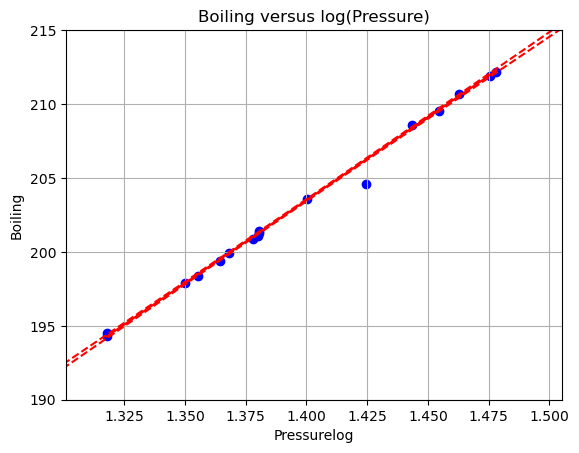

In [13]:
plt.close()
plt.xlim(np.log10([20,32]))
plt.ylim([190,215])
plt.scatter(data.Pressurelog, data.Boiling, color='blue')
plt.grid()            
plt.axhline(y=0, color='black', linewidth=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)
plt.title('Boiling versus log(Pressure)')
plt.xlabel('Pressurelog')
plt.ylabel('Boiling')
#   add best model
plt.plot(data.drop([11]).Pressurelog, modred.predict(), color='red')
#   add confidence intervals on the response
plt.plot(dataNew.Pressurelog, Pred.mean_ci_lower, color='red', linestyle='--')
plt.plot(dataNew.Pressurelog, Pred.mean_ci_upper, color='red', linestyle='--')
plt.show()

### (g) Prediction Intervals

define a new data.frame of equally spaced $x$-values covering at least the range of log(Pressure)-data

In [14]:
dataNew = pd.DataFrame({'Pressurelog': np.linspace(np.log10(15), np.log10(35), num=101)})

predict

In [15]:
Pred = modred.get_prediction(dataNew).summary_frame(alpha=0.05)
Pred.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,178.376736,0.139472,178.077598,178.675873,177.971514,178.781958
1,178.789500,0.137243,178.495142,179.083858,178.387794,179.191206
2,179.202264,0.135017,178.912682,179.491847,178.804044,179.600485
3,179.615029,0.132793,179.330217,179.899841,179.220264,180.009794
4,180.027793,0.130571,179.747747,180.307839,179.636453,180.419133


scatter diagram: Boiling versus log(Pressure) with confidence intervals on the response

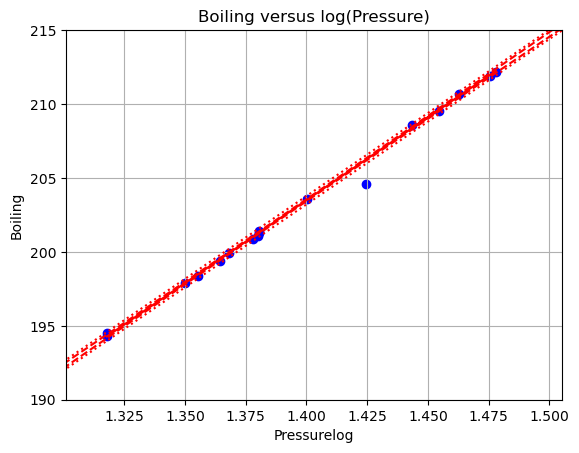

In [16]:
plt.close()
plt.xlim(np.log10([20,32]))
plt.ylim([190,215])
plt.scatter(data.Pressurelog, data.Boiling, color='blue')
plt.grid()            
plt.axhline(y=0, color='black', linewidth=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)
plt.title('Boiling versus log(Pressure)')
plt.xlabel('Pressurelog')
plt.ylabel('Boiling')
#   add best model
plt.plot(data.drop([11]).Pressurelog, modred.predict(), color='red')
#   add confidence intervals on the response
plt.plot(dataNew.Pressurelog, Pred.mean_ci_lower, color='red', linestyle='--')
plt.plot(dataNew.Pressurelog, Pred.mean_ci_upper, color='red', linestyle='--')
#   add prediction intervals
plt.plot(dataNew.Pressurelog, Pred.obs_ci_lower, color='red', linestyle=':')
plt.plot(dataNew.Pressurelog, Pred.obs_ci_upper, color='red', linestyle=':')
plt.show()